# Explore here

Bibliotecas a utilizar

In [246]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [247]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
data = pd.read_csv(url)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA - Entender la estructura de los datos

In [248]:
print(data.shape)

(1338, 7)


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [250]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [251]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Información de las variables: 

- age: Edad del beneficiario principal (numérico)  
- sex: Género del beneficiario principal (categórico)  
- bmi: índice de masa corporal (numérico)
- children: Número de niños/dependientes cubiertos por un seguro médico (numérico)  
- smoker: ¿Es fumador? (categórico)  
- region: Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)  
- charges: Prima del seguro médico (numérico)  

In [252]:
# Contar las categorías en las variables categóricas
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### Buscar outliers, identificarlos y trabajarlos

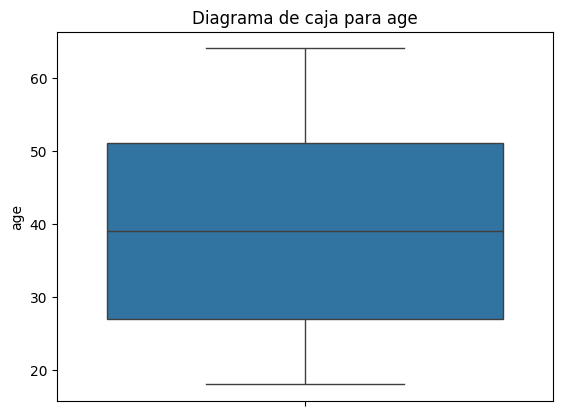

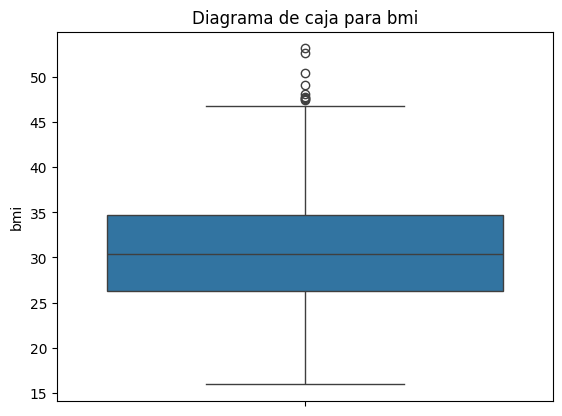

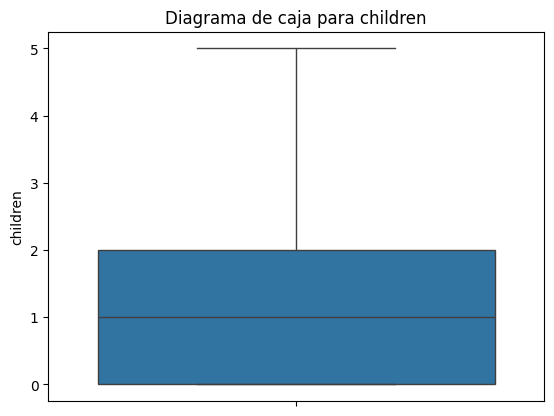

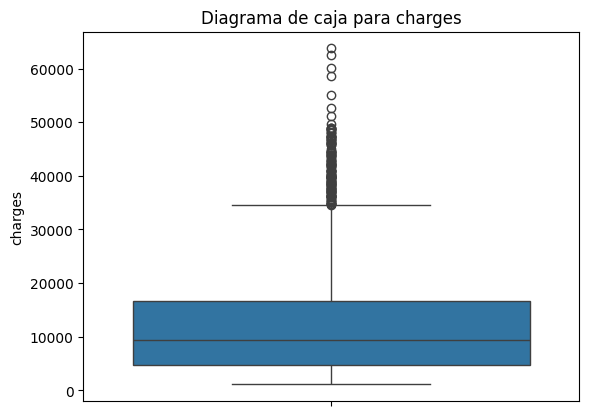

In [253]:
# Variables numéricas
variables_numericas = ['age', 'bmi', 'children', 'charges']

# Crear diagramas de caja para cada variable
for var in variables_numericas:
    sns.boxplot(data[var])
    plt.title(f'Diagrama de caja para {var}')
    plt.show()

Calculamos percentiles e IQR para trabajar outliers

In [254]:
# Definir una función para calcular outliers usando el IQR
def detect_outliers_iqr(data, column_name):
    """
    Detecta outliers en una columna usando el rango intercuartílico (IQR).
    Retorna los límites y el DataFrame de outliers.
    """
    Q1 = data[column_name].quantile(0.25)  # Percentil 25%
    Q3 = data[column_name].quantile(0.75)  # Percentil 75%
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Calcular límites
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = data[(data[column_name] < lower_limit) | (data[column_name] > upper_limit)]

    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_limit": lower_limit,
        "upper_limit": upper_limit,
        "outliers": outliers
    }



In [255]:
# Chequear outliers para "charges" y "bmi"
charges_outliers = detect_outliers_iqr(data, 'charges')
bmi_outliers = detect_outliers_iqr(data, 'bmi')

charges_outliers_summary = {
    "Límites charges": (charges_outliers['lower_limit'], charges_outliers['upper_limit']),
    "Número de outliers charges": len(charges_outliers['outliers'])
}

bmi_outliers_summary = {
    "Límites bmi": (bmi_outliers['lower_limit'], bmi_outliers['upper_limit']),
    "Número de outliers bmi": len(bmi_outliers['outliers'])
}

print(charges_outliers_summary)
print(bmi_outliers_summary)


{'Límites charges': (np.float64(-13109.1508975), np.float64(34489.350562499996)), 'Número de outliers charges': 139}
{'Límites bmi': (np.float64(13.7), np.float64(47.290000000000006)), 'Número de outliers bmi': 9}
